# ONNX Graph Visualization

You can use other notebooks to generate and serialize the ONNX model. Be careful when selecting a model. To convert the large ONNX model can take a lot of time.

(-0.5, 5384.5, 6723.5, -0.5)

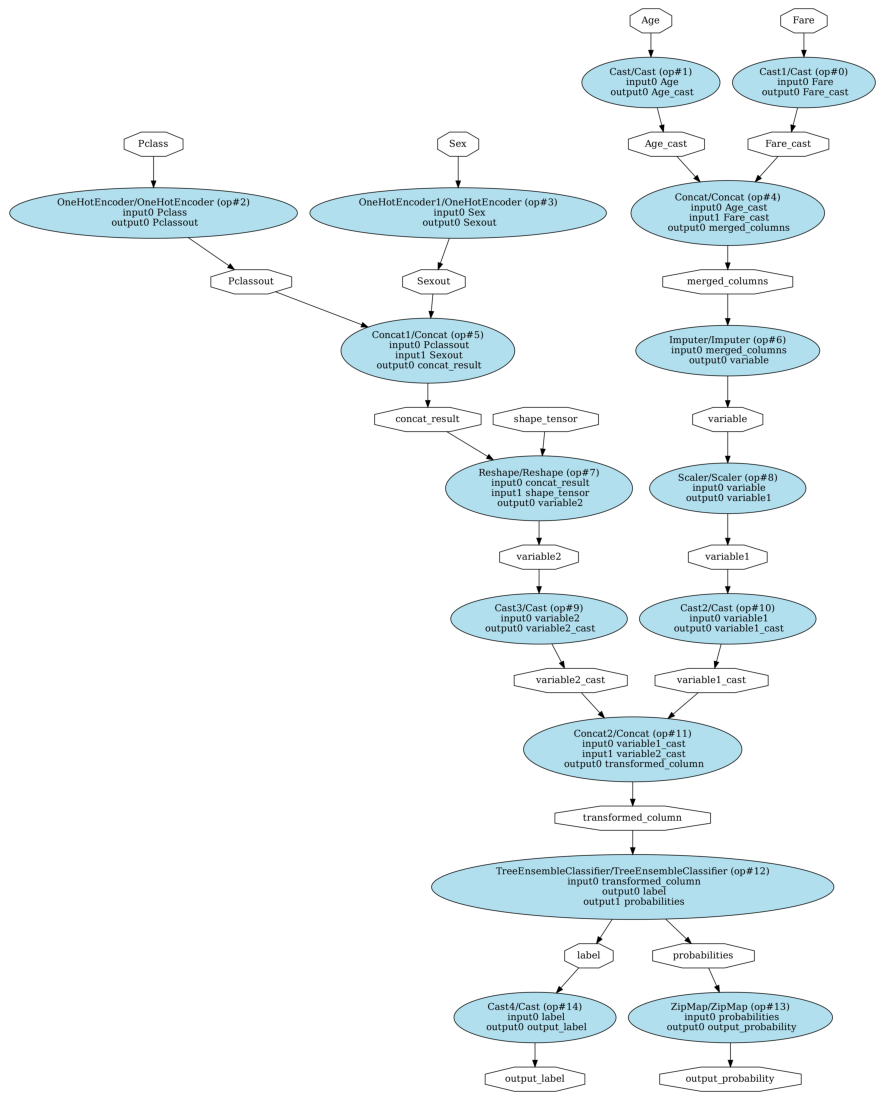

In [3]:
import os
from onnx import ModelProto
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
from matplotlib import pyplot as plt

# Sets up the temp-directory.
if not os.path.exists('tmp'):
    os.makedirs('tmp')

# Defines ONNX model filename
onnx_model_filename = 'model.onnx'

# Loads the ONNX model. 
onnx_model = ModelProto()
with open(os.path.join('tmp', onnx_model_filename), 'rb') as f:
    onnx_model.ParseFromString(f.read())

# Creates the model graph.
pydot_graph = GetPydotGraph(
    onnx_model.graph, 
    name=onnx_model.graph.name,
    rankdir="TB",
    node_producer=GetOpNodeProducer(
        "docstring",
        color="black",
        fillcolor="lightblue2",
        style="filled"
    )
)
pydot_graph.write_dot(os.path.join('tmp', 'model.dot'))

# Converts the to the PNG image.
os.system('dot -O -Gdpi=300 -Tpng tmp/model.dot')

# Visualizes the model.
image = plt.imread(os.path.join('tmp', 'model.dot.png'))
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(image)
ax.axis('off')